In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: nvidia-smi: command not found


In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mnist import MNIST
import time

# 将数字字符串转换为整数数组
X = np.array(mnist.data, dtype='uint8')
y = np.array(mnist.target, dtype='int')

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# 训练随机森林分类器
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)
end_time = time.time()
print('Time taken to train the model:', end_time - start_time, 'seconds')

# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classifier accuracy:', accuracy)



Time taken to train the model: 37.254005908966064 seconds
Random Forest Classifier accuracy: 0.9663


In [18]:
from sklearn.decomposition import PCA
# 使用PCA降维
pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, random_state=42)

# 训练随机森林分类器
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)
end_time = time.time()
print('Time taken to train the model:', end_time - start_time, 'seconds')

# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classifier accuracy:', accuracy)


Time taken to train the model: 110.98518013954163 seconds
Random Forest Classifier accuracy: 0.9461428571428572


In [9]:
len(mnist.data[:60000])

60000

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# 将数字字符串转换为整数数组
X = np.array(mnist.data, dtype='uint8')
y = np.array(mnist.target, dtype='int')
# 将图像数据和标签转化为数组形式
X = np.array(X[:60000])
y = np.array(y)

# 使用t-SNE算法进行降维
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# 绘制可视化结果
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()

KeyboardInterrupt: ignored

In [10]:
!pip install py-cpuinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import platform
import cpuinfo

# 获取平台信息和CPU信息
print("Platform: ", platform.platform())
print("CPU name: ", cpuinfo.get_cpu_info()['brand_raw'])


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5414 - accuracy: 0.8543 - val_loss: 0.4989 - val_accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3711 - accuracy: 0.9065 - val_loss: 0.3368 - val_accuracy: 0.9141
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2780 - accuracy: 0.9294 - val_loss: 0.2797 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2454 - accuracy: 0.9370 - val_loss: 0.2395 - val_accuracy: 0.9381
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2239 - accuracy: 0.9434 - val_loss: 0.2508 - val_accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2067 - accuracy: 0.9491 - val_loss: 0.2322 - val_accuracy: 0.9456
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1966 - accuracy: 0.9511 - val_loss: 0.2537 - val_accuracy:

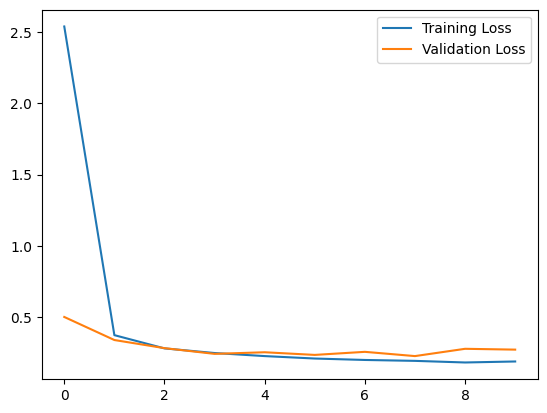

313/313 [==============================] - 0s 1ms/step


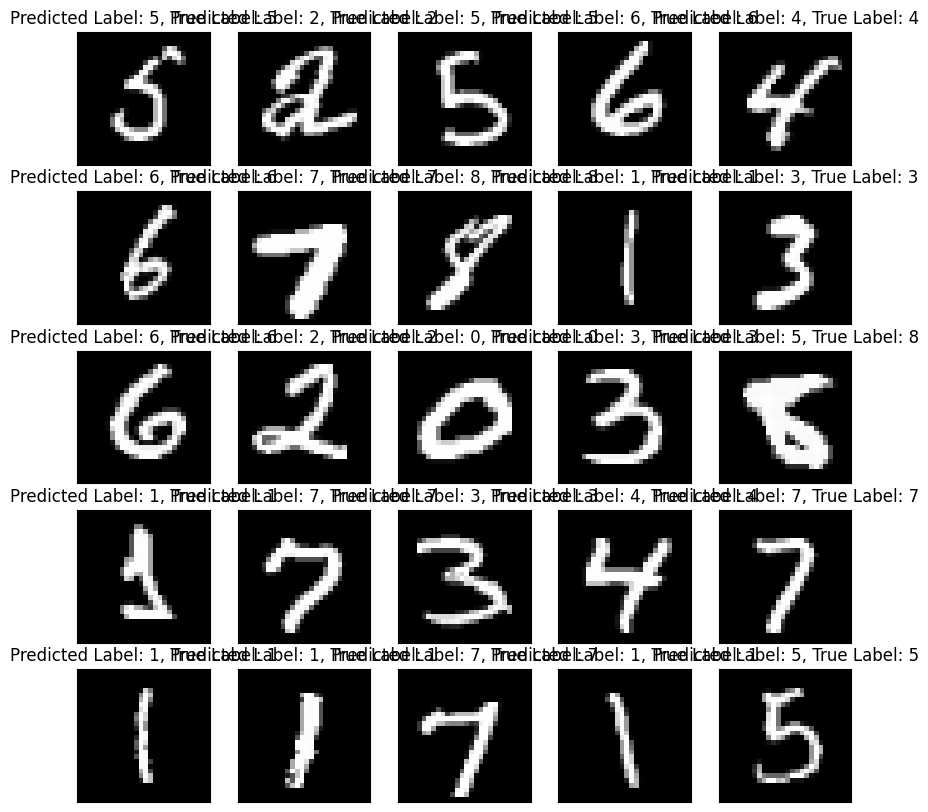

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1)
X = np.array(mnist.data, dtype=np.float32)
y = np.array(mnist.target, dtype=np.int32)

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)

# 构建神经网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
num_epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# 绘制误差曲线
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

# 绘制测试图像的分类结果
predictions = model.predict(X_test)
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_test[i], (28, 28)), cmap='gray')
    ax.set_title(f"Predicted Label: {np.argmax(predictions[i])}, True Label: {y_test[i]}")
plt.show()


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Apr 24 09:50:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    50W / 400W |   1625MiB / 40960MiB |      9%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1500/1500 [==============================] - 9s 3ms/step - loss: 0.3264 - accuracy: 0.9061 - val_loss: 0.1612 - val_accuracy: 0.9528
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1581 - accuracy: 0.9524 - val_loss: 0.1177 - val_accuracy: 0.9648
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1162 - accuracy: 0.9641 - val_loss: 0.1034 - val_accuracy: 0.9678
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0956 - accuracy: 0.9709 - val_loss: 0.0963 - val_accuracy: 0.9702
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0817 - accuracy: 0.9738 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0678 - accuracy: 0.9784 - val_loss: 0.0790 - val_accuracy: 0.9756
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0626 - accuracy: 0.9799 - val_loss: 0.0777 - val_accuracy:

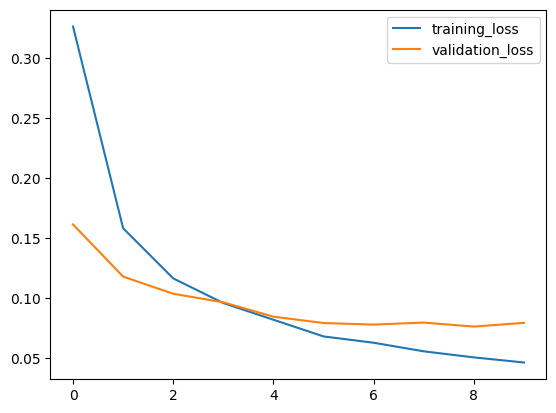

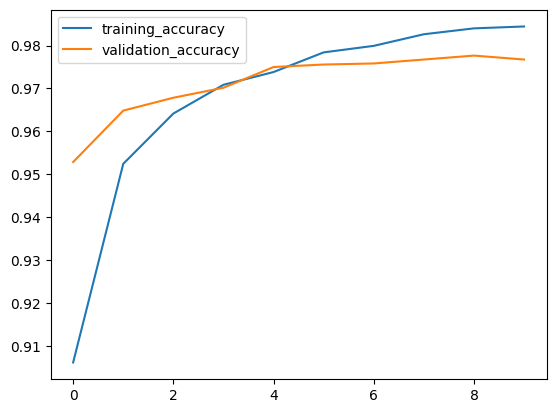

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9775
Test Loss: 0.07845644652843475
Test Accuracy: 0.9775000214576721


In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1)
X = np.array(mnist.data, dtype=np.float32)
y = np.array(mnist.target, dtype=np.int32)

# 将图像数据和标签转化为数组形式
X = np.array(X)
y = np.array(y)

# 确定训练数据和测试数据数量
train_samples = 60000
test_samples = 10000

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_samples)

# 进行数据归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 构建神经网络模型
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# 绘制训练过程中的loss和accuracy曲线
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

# 在测试集上评估模型效果
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


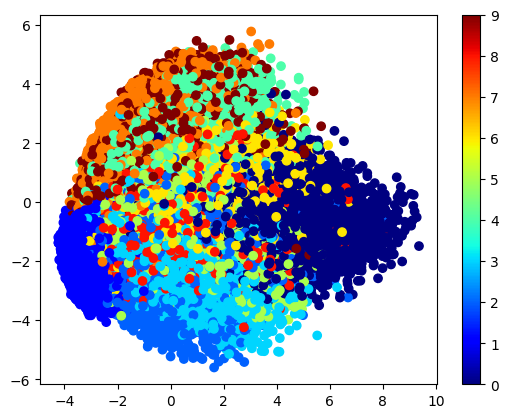

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4427 - accuracy: 0.4164 - val_loss: 1.3504 - val_accuracy: 0.4500
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3540 - accuracy: 0.4491 - val_loss: 1.3372 - val_accuracy: 0.4543
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3410 - accuracy: 0.4574 - val_loss: 1.3313 - val_accuracy: 0.4583
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3352 - accuracy: 0.4566 - val_loss: 1.3288 - val_accuracy: 0.4627
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3312 - accuracy: 0.4609 - val_loss: 1.3281 - val_accuracy: 0.4587
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3280 - accuracy: 0.4621 - val_loss: 1.3274 - val_accuracy: 0.4584
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3266 - accuracy: 0.4625 - val_loss: 1.3247 - val_accuracy:

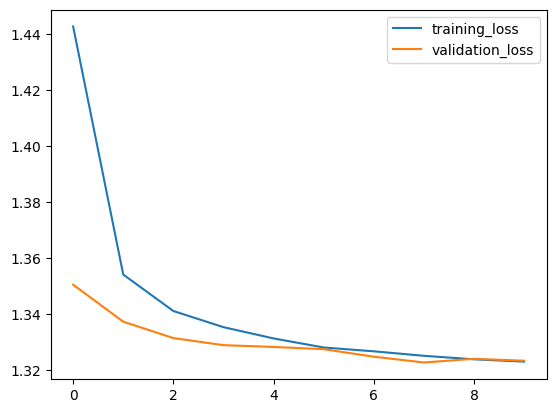

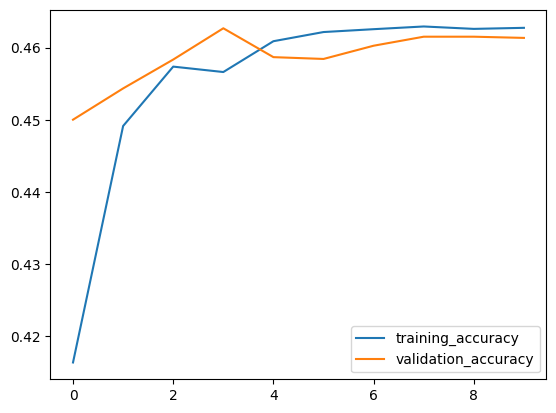

313/313 [==============================] - 1s 2ms/step - loss: 1.3136 - accuracy: 0.4688
Test Loss: 1.3136347532272339
Test Accuracy: 0.46880000829696655


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1)
X = np.array(mnist.data, dtype=np.float32)
y = np.array(mnist.target, dtype=np.int32)

# 将图像数据和标签转化为数组形式
X = np.array(X)
y = np.array(y)

# 确定训练数据和测试数据数量
train_samples = 60000
test_samples = 10000

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_samples)

# 进行数据归一化处理
X_train = X_train / 255.0
X_test = X_test / 255.0

# 使用PCA算法进行降维
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_train)

# 绘制可视化结果
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")
plt.colorbar()
plt.show()

# 构建神经网络模型
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_reduced.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
batch_size = 32
epochs = 10

history = model.fit(X_reduced, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# 绘制训练过程中的loss和accuracy曲线
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

# 用测试数据评估模型效果
# 先将测试数据降维
X_test_reduced = pca.transform(X_test)

test_loss, test_accuracy = model.evaluate(X_test_reduced, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 将图像数据和标签转化为数组形式
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# 确定训练数据和测试数据数量
train_samples = 60000
test_samples = 10000

# 划分训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=train_samples, test_size=test_samples)

# 进行数据归一化处理
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# 使用LLE算法进行降维
n_components = 2
n_neighbors = 30
X = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]])
distance_matrix = tf.reduce_sum(tf.square(X[:, None] - X), axis=2)
_, indices = tf.nn.top_k(-distance_matrix, k=n_neighbors)
W = tf.Variable(tf.zeros([X_train.shape[0], n_neighbors], dtype=tf.float32))
for i in range(X_train.shape[0]):
    Xi = X[i]
    neighbors = indices[i]
    Xj = X[neighbors]
    G = tf.matmul(Xj - Xi, (Xj - Xi), transpose_b=True)
    w = tf.matrix_solve_ls(G, tf.ones([n_neighbors, 1]), l2_regularizer=0.001)
    W[i, neighbors] = tf.transpose(w)
M = tf.eye(X_train.shape[0], dtype=tf.float32) - tf.matmul(W, tf.transpose(W))
eigval, eigvec = tf.self_adjoint_eig(M)
indices = tf.argsort(eigval)
basis = eigvec[:, indices[:n_components]]
X_train_reduced = tf.matmul(X_train, basis)
X_val_reduced = tf.matmul(X_val, basis)
X_test_reduced = tf.matmul(X_test, basis)

# 构建神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=X_train_reduced.shape[1:]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
batch_size = 32
epochs = 10

history = model.fit(X_train_reduced, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_reduced, y_val))

# 绘制训练过程中的loss和accuracy曲线
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

# 用测试数据评估模型效果
test_loss, test_accuracy = model.evaluate(X_test_reduced, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


ValueError: ignored